# Sleep Cycle Analyzer
#### This notebook has the purpose of helping users of Sleep Cycle to analyze their data in a more detailed an extensive way.
All What you need is to export your csv data to the folder where this notebook is located

## 1. Imports
Libraries needed for the analysis

In [495]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Load data
Take the data from the folder and create a DataFrame with it

In [496]:
# Name of the file
# You can change this name for your analysis
fileName = 'sleepdata.csv'

#Transform it to data frame, use as separator ; instead of ,
sleepData = pd.read_csv(fileName, sep = ';', parse_dates = ['Start', 'End'])

#Test
sleepData.head(1)

,Start,End,Sleep Quality,Regularity,Mood,Steps,Air Pressure (Pa),City,Movements per hour,Time in bed (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (°F),Weather type,Notes
0,2019-12-24 00:35:05,2019-12-24 07:59:49,76%,—,NaN,0,NaN,NaN,3.226314,26684.348,NaN,NaN,False,0,NaN,NaN,NaN


## 3. Useful functions
There are some actions that we are going to do many times, that is why is better to build some functions for them

In [497]:
# Function that plots a small histogram
def plotHist(column, binNum, lab, histTitle):
    plt.figure(figsize=(10, 6))
    plt.hist(x=column, bins=binNum)
    plt.xlabel(lab)
    plt.ylabel('# of elements')
    plt.title(histTitle)
    plt.show() 

## 4. Data Previsualization and Corrections
We need to check how correct is the information collected and if there are empty values in our columns or rows

### 4.1 Simple elements and types

In [498]:
# Check data types
sleepData.dtypes

Start                       datetime64[ns]
End                         datetime64[ns]
Sleep Quality                       object
Regularity                          object
Mood                                object
Steps                                int64
Air Pressure (Pa)                  float64
City                                object
Movements per hour                 float64
Time in bed (seconds)              float64
Window start                        object
Window stop                         object
Did snore                             bool
Snore time                           int64
Weather temperature (°F)           float64
Weather type                        object
Notes                               object
dtype: object

Now, we can see some problems with the data. There are many object values, probably wrong formated. 


In [499]:
# Describe the dataframe
sleepData.describe()

,Steps,Air Pressure (Pa),Movements per hour,Time in bed (seconds),Snore time,Weather temperature (°F)
count,1161.000000,73.000000,1161.000000,1161.000000,1161.000000,80.000000
mean,1828.403101,101.794384,24.100983,26518.337745,32.540052,53.212500
std,3390.050450,0.171148,28.518375,5252.632458,307.882448,10.259536
min,0.000000,101.330000,0.000000,930.855000,0.000000,42.000000
25%,0.000000,101.680000,1.435952,26006.814000,0.000000,47.000000
50%,0.000000,101.820000,4.091839,27281.616000,0.000000,49.000000
75%,2453.000000,101.900000,48.659584,28002.859000,0.000000,53.000000
max,19558.000000,102.080000,247.475340,95064.760000,5130.000000,77.000000


In [500]:
# Dataframe information
sleepData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Start                     1161 non-null   datetime64[ns]
 1   End                       1161 non-null   datetime64[ns]
 2   Sleep Quality             1161 non-null   object        
 3   Regularity                1161 non-null   object        
 4   Mood                      90 non-null     object        
 5   Steps                     1161 non-null   int64         
 6   Air Pressure (Pa)         73 non-null     float64       
 7   City                      67 non-null     object        
 8   Movements per hour        1161 non-null   float64       
 9   Time in bed (seconds)     1161 non-null   float64       
 10  Window start              568 non-null    object        
 11  Window stop               568 non-null    object        
 12  Did snore           

Here we can see another problem, we have 793 rows, but many columns barely have a 100 non null values

#### 4.1.2 Correcting type problems
##### 4.1.2.1. Regularity should be a Number

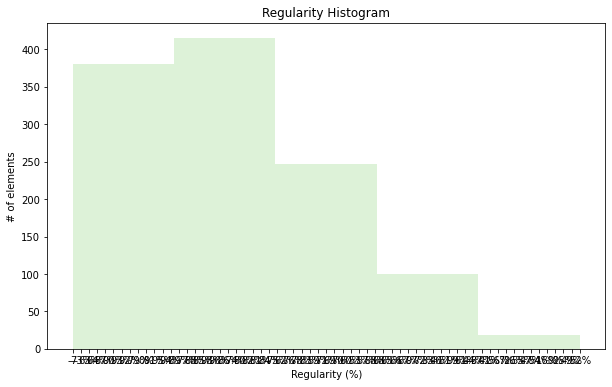

In [501]:
# See the regularity values
plotHist(column=sleepData['Regularity'], binNum=5, lab='Regularity (%)', histTitle='Regularity Histogram')

Inmediatly we can see the problem, the x axis values are not even in order, we need to fix it by changing our column to float.
I was trying to simple remove % and the tranform to float, but it seems there are some values that are '—', so, we are going to fix them first. I also found a problem where the regularity had a date value for some reason, so I will remove it too.

In [502]:
# Remove the columns that are equal to '—' or 'NaT'
sleepData = sleepData[sleepData['Regularity'] != '—']
sleepData= sleepData[sleepData['Regularity'] != 'NaT']
print(sleepData.head(1))

                Start                 End Sleep Quality Regularity Mood  \
1 2019-12-25 02:31:57 2019-12-25 09:13:36           69%        73%  NaN   

   Steps  Air Pressure (Pa) City  Movements per hour  Time in bed (seconds)  \
1      0                NaN  NaN            5.965321              24099.076   

  Window start Window stop  Did snore  Snore time  Weather temperature (°F)  \
1          NaN         NaN       True          60                       NaN   

  Weather type Notes  
1          NaN   NaN  


In [503]:
# Remove de % symbol frome every number
sleepData['Regularity'] = sleepData['Regularity'].astype('str')
sleepData['Regularity'] = sleepData['Regularity'].str.strip('%')
sleepData['Regularity'] = sleepData['Regularity'].astype('float')

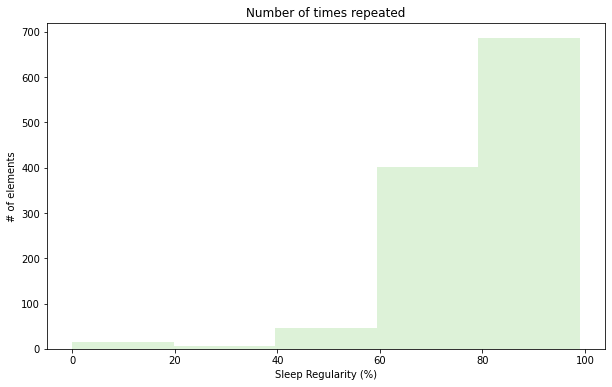

In [504]:
# See the regularity values
plotHist(column=sleepData['Regularity'], binNum=5, lab='Sleep Regularity (%)', histTitle='Number of times repeated')

##### 4.1.2.2. Sleep Quality  should be a Number

In [505]:
# Remove the columns that are equal to '—' or 'NaT'
sleepData = sleepData[sleepData['Sleep Quality'] != '—']
sleepData= sleepData[sleepData['Sleep Quality'] != 'NaT']
print(sleepData.head(1))

                Start                 End Sleep Quality  Regularity Mood  \
1 2019-12-25 02:31:57 2019-12-25 09:13:36           69%        73.0  NaN   

   Steps  Air Pressure (Pa) City  Movements per hour  Time in bed (seconds)  \
1      0                NaN  NaN            5.965321              24099.076   

  Window start Window stop  Did snore  Snore time  Weather temperature (°F)  \
1          NaN         NaN       True          60                       NaN   

  Weather type Notes  
1          NaN   NaN  


In [506]:
# Remove de % symbol frome every number
sleepData['Sleep Quality'] = sleepData['Sleep Quality'].astype('str')
sleepData['Sleep Quality'] = sleepData['Sleep Quality'].str.strip('%')
sleepData['Sleep Quality'] = sleepData['Sleep Quality'].astype('float')

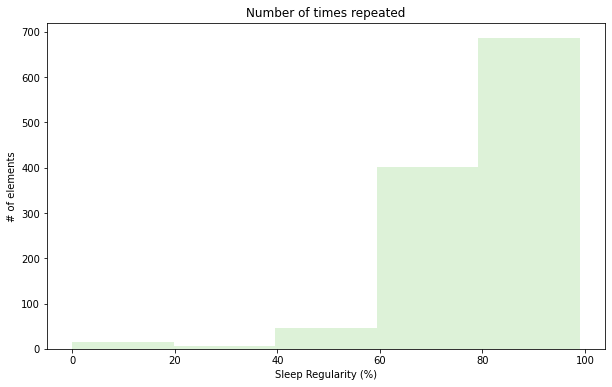

In [507]:
# See the sleep quality values
plotHist(column=sleepData['Regularity'], binNum=5, lab='Sleep Regularity (%)', histTitle='Number of times repeated')

##### 4.1.2.3. Add time in bed in hours

In [508]:
# Create new column for time in bed in hours
sleepData['Time in bed (hours)'] = sleepData['Time in bed (seconds)'] / 3600
print(sleepData.head(1))

                Start                 End  Sleep Quality  Regularity Mood  \
1 2019-12-25 02:31:57 2019-12-25 09:13:36           69.0        73.0  NaN   

   Steps  Air Pressure (Pa) City  Movements per hour  Time in bed (seconds)  \
1      0                NaN  NaN            5.965321              24099.076   

  Window start Window stop  Did snore  Snore time  Weather temperature (°F)  \
1          NaN         NaN       True          60                       NaN   

  Weather type Notes  Time in bed (hours)  
1          NaN   NaN             6.694188  


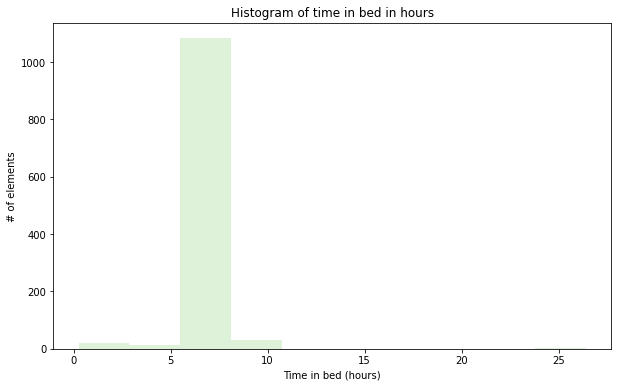

In [509]:
# Histogram for showing time in bed in hours occurencies
plotHist(column=sleepData['Time in bed (hours)'], binNum=10, lab= 'Time in bed (hours)', histTitle='Histogram of time in bed in hours')

We can see some out of range elements that we will fix in the next section

##### 4.1.2.4. Column only for the hours and minutes of the start and end cols

In [510]:
# New cols for start and end hours and minutes only
sleepData['Start time'] = sleepData['Start'].dt.strftime('%H:%M')
sleepData['End time'] = sleepData['End'].dt.strftime('%H:%M')

# New cols for start and end hours only
sleepData['Start hour'] = sleepData['Start'].dt.strftime('%H').astype('int')
sleepData['End hour'] = sleepData['End'].dt.strftime('%H').astype('int')

sleepData.head(1)

,Start,End,Sleep Quality,Regularity,Mood,Steps,Air Pressure (Pa),City,Movements per hour,Time in bed (seconds),...,Did snore,Snore time,Weather temperature (°F),Weather type,Notes,Time in bed (hours),Start time,End time,Start hour,End hour
1,2019-12-25 02:31:57,2019-12-25 09:13:36,69.0,73.0,NaN,0,NaN,NaN,5.965321,24099.076,...,True,60,NaN,NaN,NaN,6.694188,02:31,09:13,2,9


##### 4.1.2.5 Adding a day, month and year column
Adding some columns that will allow us to understand better our sleep related to certain times. 

In [511]:
# Creates column for the day of the week
sleepData['Weekday'] = sleepData['Start'].dt.weekday

# Creates a column for the number of day of the month
sleepData['Day'] = sleepData['Start'].dt.strftime('%d').astype(int)

# Creates a column for the number of month
sleepData['Month'] = sleepData['Start'].dt.strftime('%m').astype(int)

# Creates a column for the year
sleepData['Year'] = sleepData['Start'].dt.strftime('%Y').astype(int)

### 4.2 Range constraints
Some situations can cause the app to record too long or too short sessions. We want to check with a histogram if this is the case and correct it.

#### 4.2.1 Sleep time (Hours) range constraints
There are some days where I forgot to turn off the alarm and others where I tried to measure naps, this would be outliers in our data set.

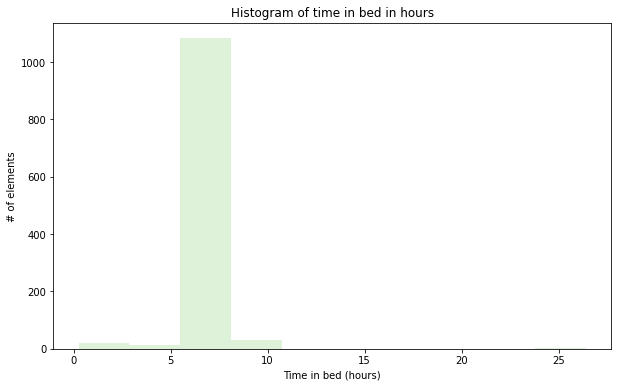

In [512]:
# Histogram for looking at outliers
plotHist(column=sleepData['Time in bed (hours)'], binNum=10, lab= 'Time in bed (hours)', histTitle='Histogram of time in bed in hours')

As we can see, there are some values that are extremely out of range, that is why we will apply range constrictions and only allow values over 4 hours and under 10 hours of sleep.

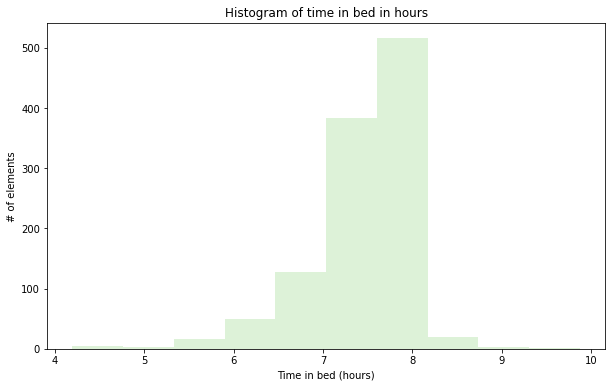

In [513]:
# Correct ranges
sleepData = sleepData[(sleepData['Time in bed (hours)'] < 10) & (sleepData['Time in bed (hours)'] > 4)]

# Histogram for correct times
plotHist(column=sleepData['Time in bed (hours)'], binNum=10, lab= 'Time in bed (hours)', histTitle='Histogram of time in bed in hours')

In [514]:
#Check if we deleted too many rows
sleepData.shape

(1125, 26)

As we applied this to all the rows, we don't need to repeat the operation for the time in seconds, as they were already dropped.

#### 4.2.2 Movements per night constraints

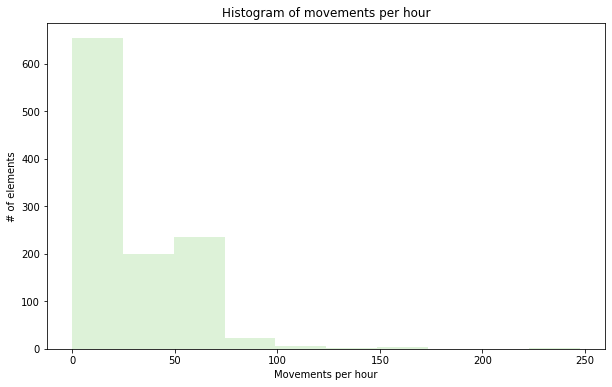

In [515]:
# Histogram for looking outliers in the movements I did at night
plotHist(column=sleepData['Movements per hour'], binNum=10, lab= 'Movements per hour', histTitle='Histogram of movements per hour')

In [516]:
#Number of ocurrencies
sleepData['Movements per hour'].value_counts(bins=10, ascending=True)

(173.233, 197.98]       0
(197.98, 222.728]       0
(222.728, 247.475]      1
(123.738, 148.485]      2
(148.485, 173.233]      4
(98.99, 123.738]        5
(74.243, 98.99]        23
(24.748, 49.495]      200
(49.495, 74.243]      236
(-0.248, 24.748]      654
Name: Movements per hour, dtype: int64

Now, we can see some outliers, probably because I used the app on trips where there could be more than one person per room. We are going to remove the ones where we have more than 95 movements and less than 0.

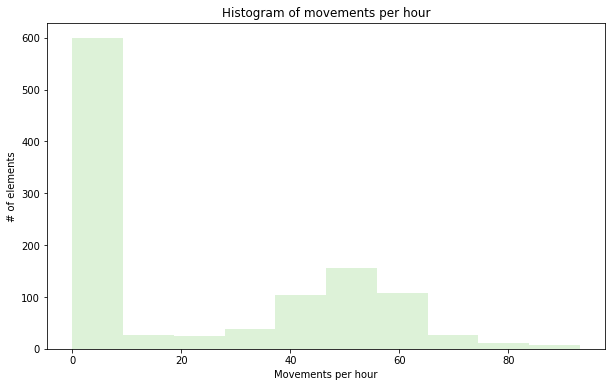

In [517]:
#Remove outliers
sleepData = sleepData[(sleepData['Movements per hour'] > 0) & (sleepData['Movements per hour'] < 95)]

# Histogram for looking how many movements I did
plotHist(column=sleepData['Movements per hour'], binNum=10, lab= 'Movements per hour', histTitle='Histogram of movements per hour')

In [518]:
# See if we deleted too many rows
sleepData.shape

(1102, 26)

I was initially planning on deleting values that were 0, however, I found that I would loose an big amount of rows and same problem happened with step counts. We can not delete them as that would remove too much data, but we shall not use them as much, as we know that most of their values are 0.

### 4.3 Wrong data collection
Now, there is a problem that specifically happened to me. It was related to the amount of data I collected. On the year 2022, the app seemed to have a bug where the sleep quality was always between 72 in the worst cases and 77 in the best. I had to send an email to the company with my case, which they ended up fixing at the end of 2022. This was not common, as you will see in the following diagram.

<Axes: xlabel='Sleep Quality', ylabel='Count'>

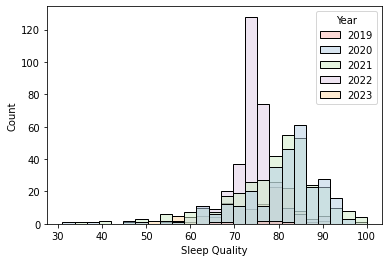

In [519]:
# Histograms of every year
sns.histplot(data=sleepData, x='Sleep Quality', bins = 25, hue= sleepData['Year'], palette='Pastel1')

Let's see what this problem implied when doing analysis without knowing it. 


##### 4.3.1 Before deleting year 2022
This is the analysis before deleting all 2022 registers

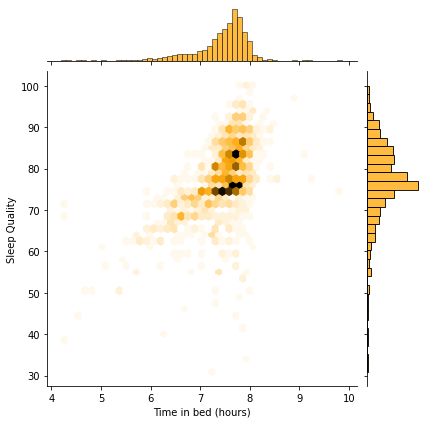

In [520]:
quality = sleepData['Sleep Quality']
hoursInBed = sleepData['Time in bed (hours)']

# Join plot
sns.jointplot(x=hoursInBed, y=quality, kind="hex", color="#ffa500")
plt.show()

<Axes: xlabel='Time in bed (hours)', ylabel='Sleep Quality'>

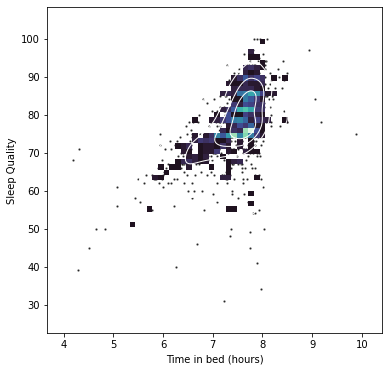

In [521]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=hoursInBed, y=quality, s=5, color=".15")
sns.histplot(x=hoursInBed, y=quality, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=hoursInBed, y=quality, levels=5, color="w", linewidths=1)

OPTIONAL: I'm going to let a method here for deleting any year from the analysis. If you don't have any problem with any year of your data then comment the excecution of that method.

In [522]:
# Function for deleting years
def deleteYear(year):
    global sleepData
    sleepData = sleepData[sleepData['Year'] != year]

# Deleting year 2022
# COMMENT THIS LINE FOR NOT DELETING ANY YEAR
deleteYear(2022)

##### 4.3.1 After deleting 2022 year

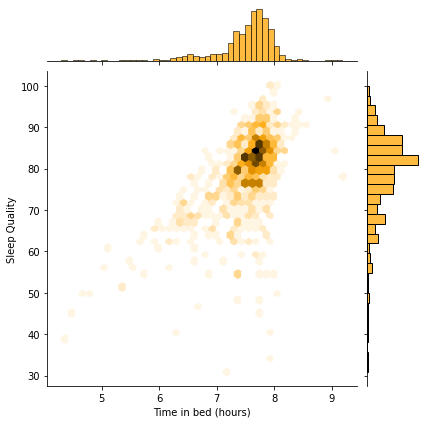

In [523]:
quality = sleepData['Sleep Quality']
hoursInBed = sleepData['Time in bed (hours)']

# Join plot
sns.jointplot(x=hoursInBed, y=quality, kind="hex", color="#ffa500")
plt.show()

<Axes: xlabel='Time in bed (hours)', ylabel='Sleep Quality'>

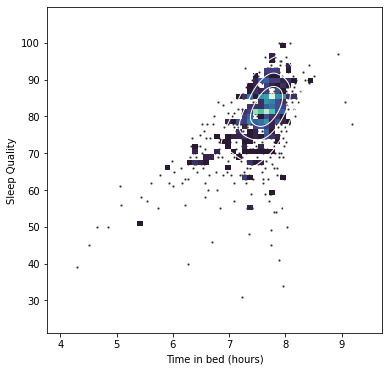

In [524]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=hoursInBed, y=quality, s=5, color=".15")
sns.histplot(x=hoursInBed, y=quality, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=hoursInBed, y=quality, levels=5, color="w", linewidths=1)

## 5. EDA Overview
Now it's time to see some of the results of the data analysis

### 5.0 General Analysis
In this section we review the basics aspects from our data

##### 5.0.1 Important variables
First, we are going to define some variables that are going to be useful for our analysis.

In [525]:
# All the variables we will analyze
secondsInBed = sleepData['Time in bed (seconds)']

wSleep = sleepData.sort_values('Sleep Quality').head(70)

#The 'worst' sleep quality days
worstSleep = sleepData[sleepData['Sleep Quality'] < 60]

#The 'normal' sleep quality days
normalSleep = sleepData[(sleepData['Sleep Quality'] >= 60) & (sleepData['Sleep Quality'] <= 90)]

#The 'best' sleep quality days
bestSleep = sleepData[sleepData['Sleep Quality'] > 90]

##### 5.0.1 Correlations

Lets start by showing all the correlations that we can plot for checking what affects sleep quality.

C:\Users\Juan Sebastian\AppData\Local\Temp\ipykernel_23756\3861048731.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sleepData.corr()


<Axes: >

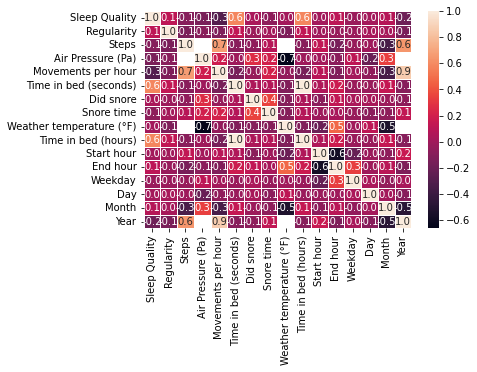

In [526]:
# Correlations with sleep quality
corr = sleepData.corr()
sns.heatmap(corr, annot=True, linewidths=0.5, fmt=".1f")

Now, from here we can find many conclusions
1. Sleep Quality is mostly affected by Time in Bed and Movements per hour
2. Movements per hour is highly correlated with steps
3. Start and end hour seem to rather have no effect on sleep quality, just as regularity

Knowing theses things, let's start by plotting those values against each other

### 5.1 Sleep Quality Analysis
Here we are going to make analysis about factors that affect the sleep quality.

#### 5.1.1 Sleep Quality vs Time in bed in Hours
We want to find how much time is the optimal time for sleeping with the highest quality

##### 5.1.1.1 Relplots of sleep quality vs time in bed in hours

0.5801635643531958

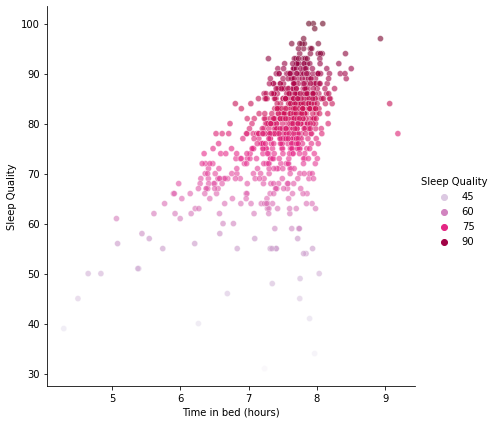

In [527]:
# Plot that shows the relation between sleep quality and time in bed in hours
sns.set_palette("GnBu")
sns.relplot(x= 'Time in bed (hours)', y = 'Sleep Quality', data = sleepData, hue= sleepData['Sleep Quality'], palette='PuRd' ,height=6, aspect=1, alpha = 0.6)
sleepData['Sleep Quality'].corr(sleepData['Time in bed (hours)']) 

Average Sleep Quality by Year


C:\Users\Juan Sebastian\AppData\Local\Temp\ipykernel_23756\3875949361.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sleepData.groupby(sleepData['Year']).mean()['Sleep Quality']


Year
2019    75.428571
2020    80.494845
2021    78.852601
2023    74.575000
Name: Sleep Quality, dtype: float64

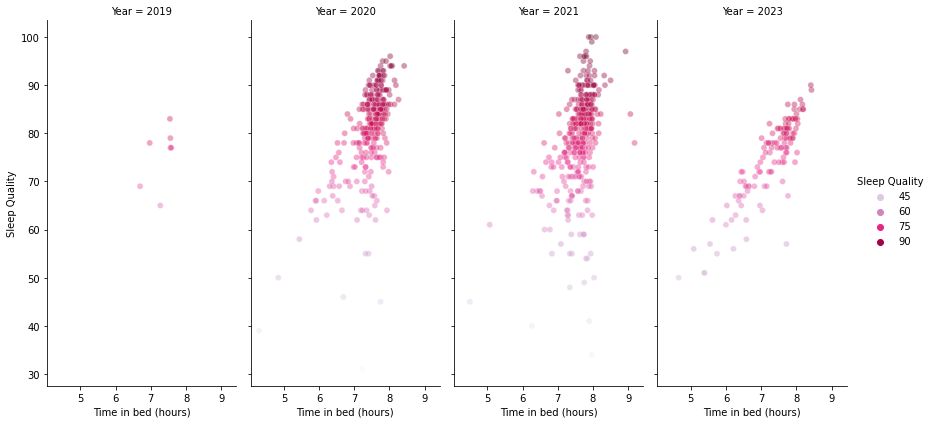

In [528]:
# Plot for showing sleep quality over the years
sns.relplot(x= 'Time in bed (hours)', y = 'Sleep Quality', data = sleepData, hue= sleepData['Sleep Quality'], palette='PuRd', col = sleepData['Year'] ,height=6, aspect=0.5, alpha = 0.4)
print('Average Sleep Quality by Year')
sleepData.groupby(sleepData['Year']).mean()['Sleep Quality']

0.08411022362271367

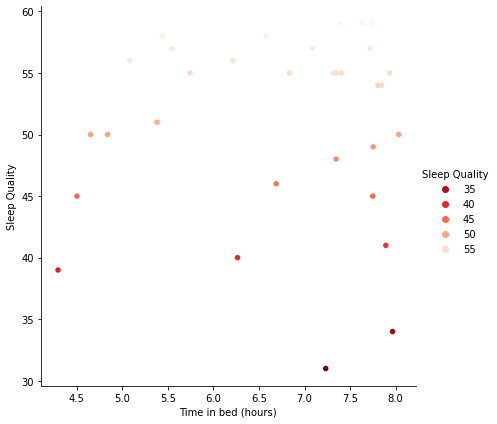

In [529]:
# Plot for showing my 'worst' sleep quality days
sns.set_palette("GnBu")
sns.relplot(x= 'Time in bed (hours)', y = 'Sleep Quality', data = worstSleep, hue= worstSleep['Sleep Quality'], palette='Reds_r', height=6, aspect=1)
worstSleep['Sleep Quality'].corr(worstSleep['Time in bed (hours)']) 

0.2586220847718481

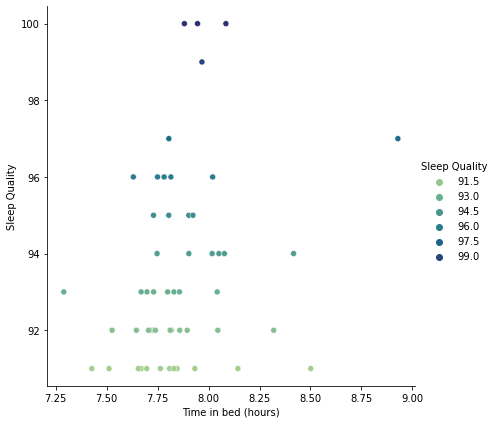

In [530]:
# Plot for showing my 'best' sleep quality days
sns.set_palette("GnBu")
sns.relplot(x= 'Time in bed (hours)', y = 'Sleep Quality', data = bestSleep, hue= bestSleep['Sleep Quality'], palette='crest', height=6, aspect=1)
bestSleep['Sleep Quality'].corr(bestSleep['Time in bed (hours)'])

0.5872865715093037

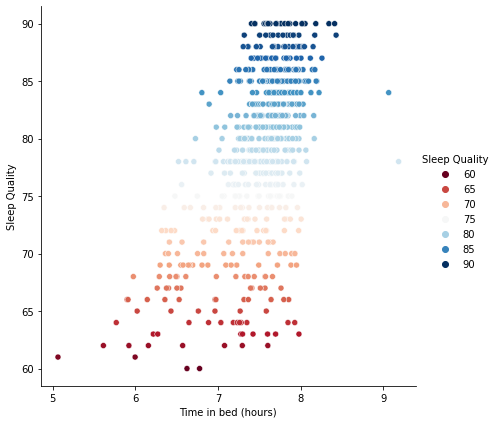

In [531]:
# Plot for showing my 'normal' sleep quality days
sns.set_palette("GnBu")
sns.relplot(x= 'Time in bed (hours)', y = 'Sleep Quality', data = normalSleep, hue= normalSleep['Sleep Quality'], palette='RdBu', height=6, aspect=1)
normalSleep['Sleep Quality'].corr(normalSleep['Time in bed (hours)'])

###### Relplots conclusions
Now, from my specific insights I can find some important conclusions from the relplots
1. Sleeping less than 7 hours rarely gets me over 80% sleep quality
2. All of my few 100% quality sleeps have been around 8 hours of sleep
3. Sleeping more than 8 hours and a half tends to decrease my sleep quality, si rare to have 'best' sleep with those values
4. 2020 and 2021 where my best years in terms of sleep quality
5. Worst sleep days (less than 60%) seem to be rather random related to sleep time
6. For getting 'best' sleep quality I need to sleep a minimum of 7 hours and a half

##### 5.1.1.2 Jointplots of sleep quality vs time in bed in hours

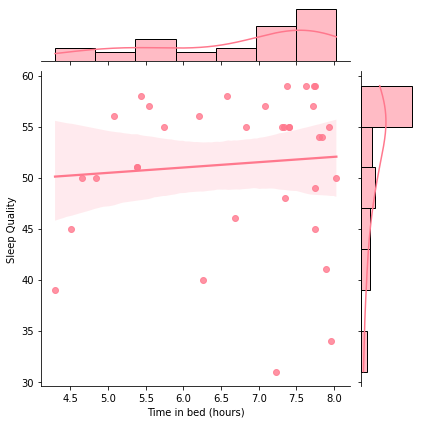

In [532]:
# Join plot
sns.jointplot(x=worstSleep['Time in bed (hours)'], y=worstSleep['Sleep Quality'], kind="reg", color="#FF788D")
plt.show()

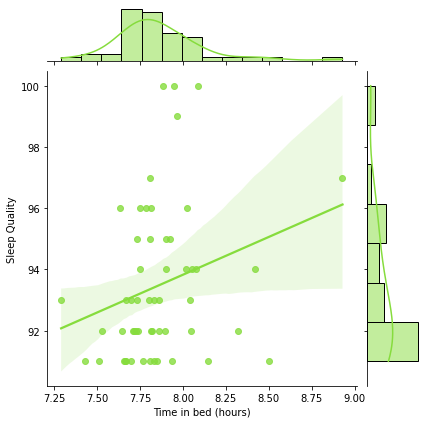

In [533]:
# Join plot
sns.jointplot(x=bestSleep['Time in bed (hours)'], y=bestSleep['Sleep Quality'], kind="reg", color="#86DC3D")
plt.show()

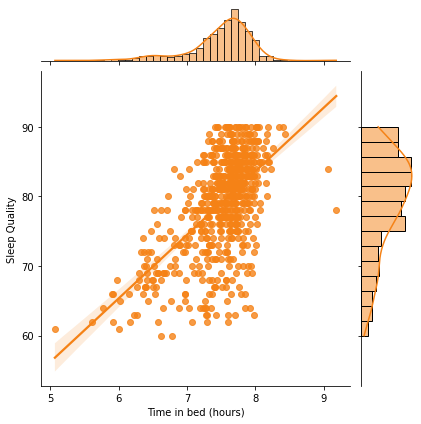

In [534]:
# Join plot
sns.jointplot(x=normalSleep['Time in bed (hours)'], y=normalSleep['Sleep Quality'], kind="reg", color="#F58216")
plt.show()

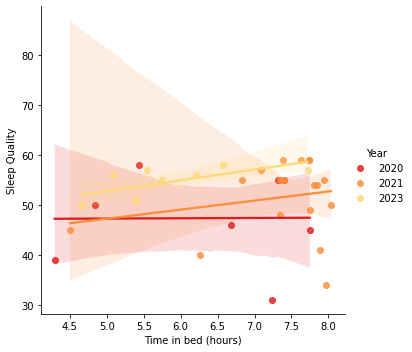

In [535]:
# Lmplot
sns.lmplot(data = worstSleep, x='Time in bed (hours)', y='Sleep Quality', hue="Year", palette='YlOrRd_r')
plt.show()

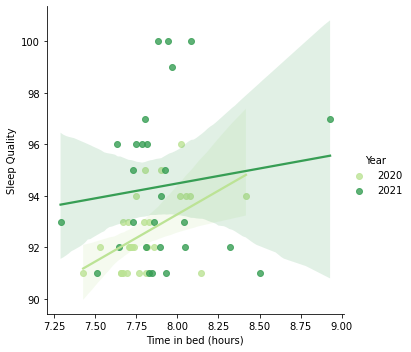

In [536]:
# Lmplot
sns.lmplot(data = bestSleep, x='Time in bed (hours)', y='Sleep Quality', hue="Year", palette='YlGn')
plt.show()

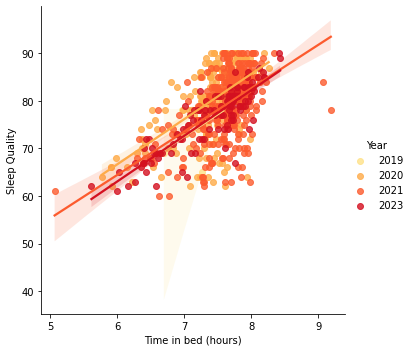

In [537]:
# Lmplot
sns.lmplot(data = normalSleep, x='Time in bed (hours)', y='Sleep Quality', hue="Year", palette='YlOrRd')
plt.show()

##### 5.1.1.3 Violin plots of sleep quality vs time in bed in hours

<Axes: xlabel='Time in bed (hours) rounded', ylabel='Sleep Quality'>

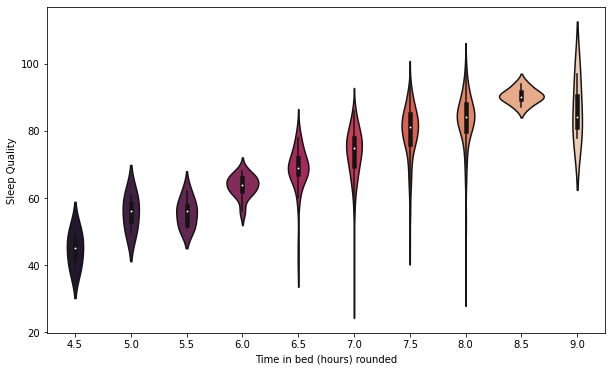

In [538]:
# General violin plot
# Create a new column that rounds up the time in bed (hours) to the nearest half hour
sleepData['Time in bed (hours) rounded'] = sleepData['Time in bed (hours)'].apply(lambda x: round(x*2)/2)

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a violin plot to see the distribution of sleep quality by time in bed (hours) rounded
sns.violinplot(x="Time in bed (hours) rounded", y="Sleep Quality", data=sleepData, palette="rocket")

<Axes: xlabel='Time in bed (hours) rounded', ylabel='Sleep Quality'>

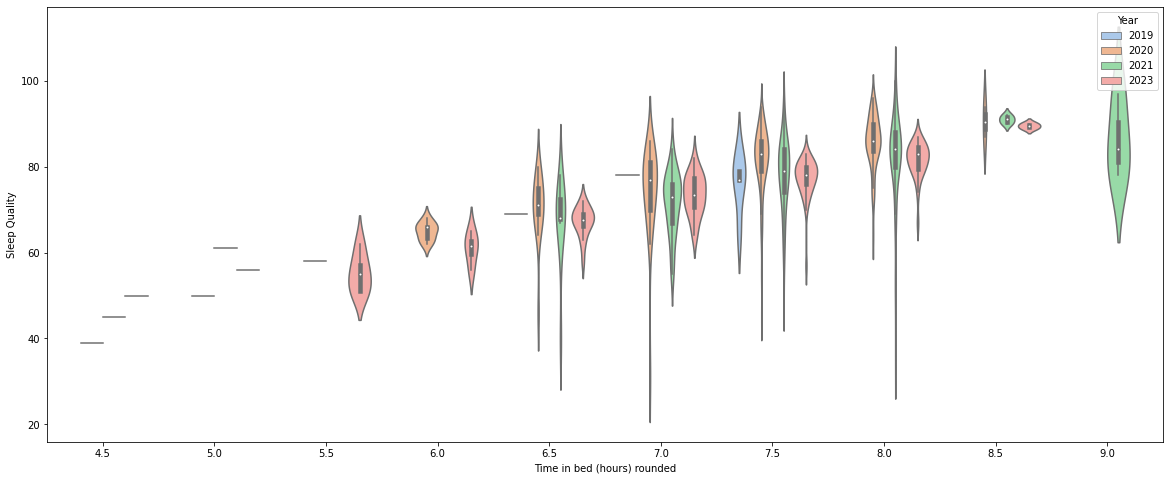

In [539]:
# Year by year violin plot
# Set the figure size
fig, ax = plt.subplots(figsize=(20, 8))

# Plots a violin plot for every year comparing the time in bed (hours) rounded and the sleep quality
sns.violinplot(x="Time in bed (hours) rounded", y="Sleep Quality", hue="Year", data=sleepData, palette="pastel")

<Axes: xlabel='Time in bed (hours) rounded', ylabel='Sleep Quality'>

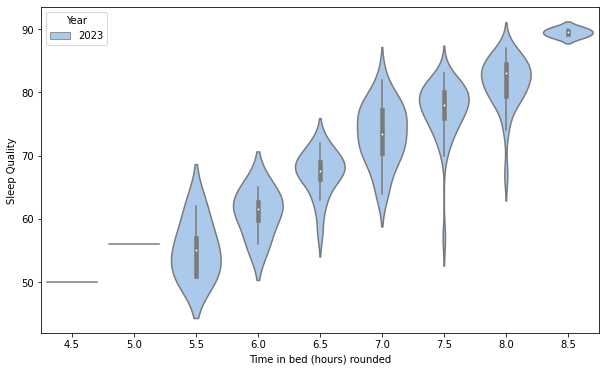

In [540]:
# Year 2023 data
# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plots a violin plot for every year comparing the time in bed (hours) rounded and the sleep quality for the `year` 2023
sns.violinplot(x="Time in bed (hours) rounded", y="Sleep Quality", hue="Year", data=sleepData[sleepData['Year'] == 2023], palette="pastel")

Now, from this violin plots we can conclude son important things:
- As we can se, having 8 hours of sleep does not guarantee a great sleep in many cases, there might be other variables that affect this results.
- The year 2023 has been more consistent in terms of ranges that different hours have on the sleep quality, while years like 2021 had a lot more variablity
- There is dangerous pattern that we can see with the data, year by year the sleep quality has decreased, even with the same sleep times

#### 5.2.1 Sleep Quality vs Start hour and time in bed
We want to find which hours should I be sleeping to have a good sleep and how many hours should I sleep in each case

In [541]:
# General plots of the sleep quality vs Start hour

# Copy the sleepData dataframe for modifications
sleepDataCopy = sleepData.copy()

# Drop rows where Start hour is 4, 5 or 6
sleepDataCopy = sleepDataCopy.drop(sleepDataCopy[sleepDataCopy['Start hour'] == 4].index)
sleepDataCopy = sleepDataCopy.drop(sleepDataCopy[sleepDataCopy['Start hour'] == 5].index)
sleepDataCopy = sleepDataCopy.drop(sleepDataCopy[sleepDataCopy['Start hour'] == 6].index)

##### 5.2.1.1 Boxplots

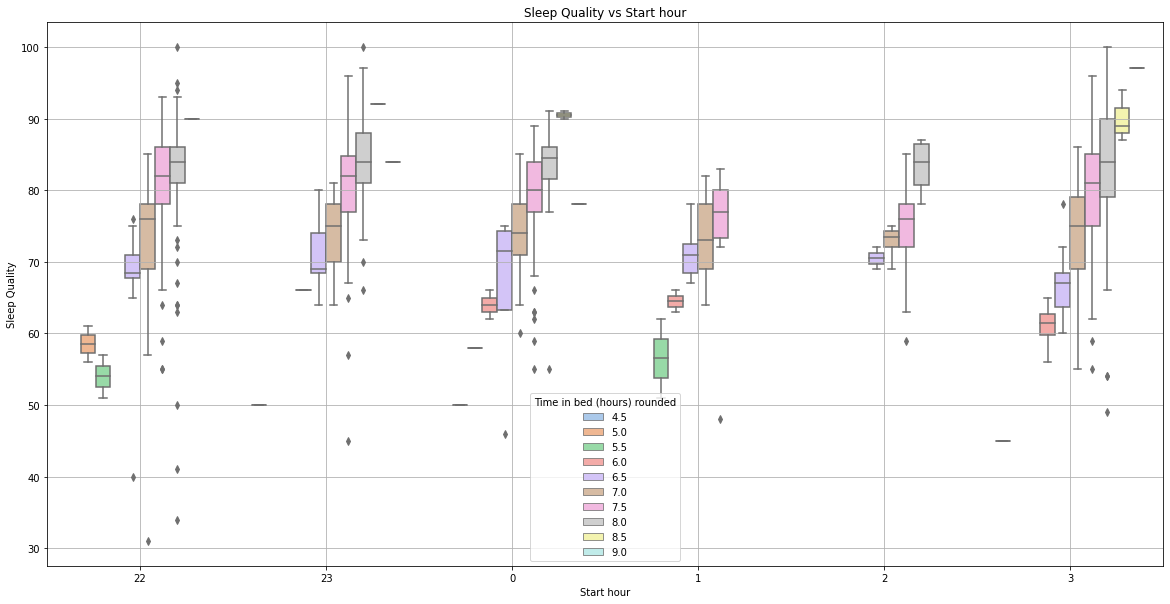

In [542]:
# Plot the figure
# Set the figure size
fig, ax = plt.subplots(figsize=(20, 10))

# Box plot of the sleep quality vs Start hour, the hue is related to the amount of time in bed (hours) rounded
sns.boxplot(x="Start hour", y="Sleep Quality", hue="Time in bed (hours) rounded", data=sleepDataCopy, palette="pastel")

# Change the x order to show 22 and 23 before 0, 1,2 and 3
ax.set_xticklabels(['22', '23', '0', '1', '2', '3'])

# Add a title
plt.title('Sleep Quality vs Start hour')

# Add grid lines
plt.grid(True)

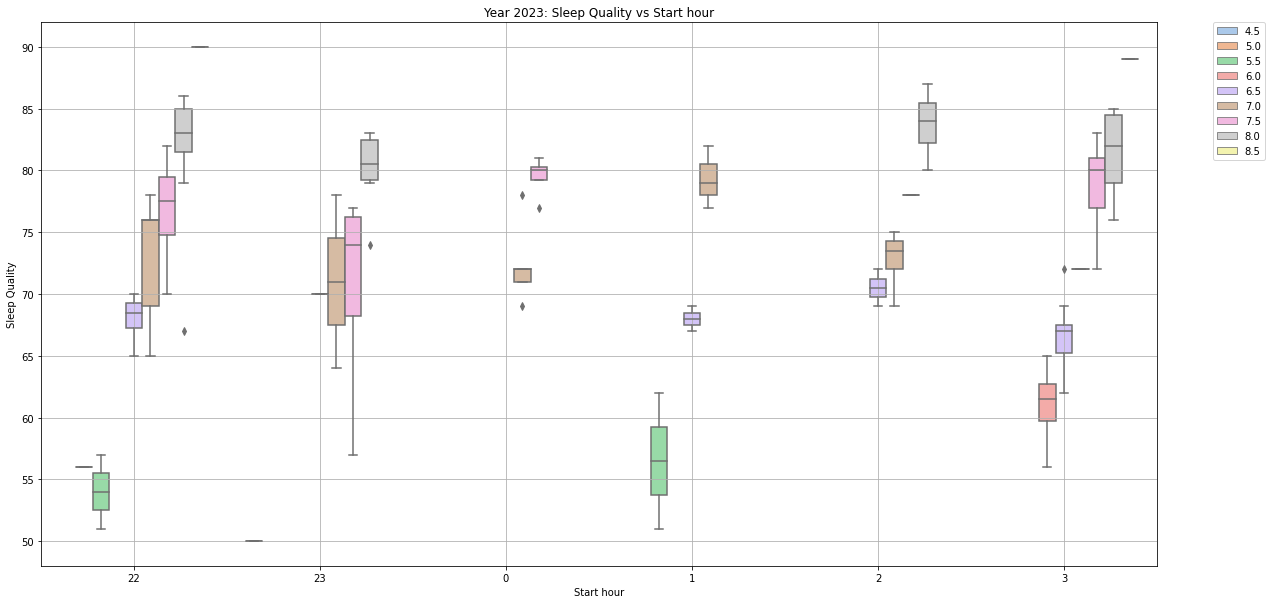

In [547]:
# Sleep quality vs Start hour for the year 2023
# Set the figure size
fig, ax = plt.subplots(figsize=(20, 10))

# Box plot of the sleep quality vs Start hour, the hue is related to the amount of time in bed (hours) rounded for the year 2023
sns.boxplot(x="Start hour", y="Sleep Quality", hue="Time in bed (hours) rounded", data=sleepDataCopy[sleepDataCopy['Year'] == 2023], palette="pastel")

# Change the x order to show 22 and 23 before 0, 1,2 and 3
ax.set_xticklabels(['22', '23', '0', '1', '2', '3'])

# Add a title
plt.title('Year 2023: Sleep Quality vs Start hour')

# Add grid lines
plt.grid(True)

# Change hue indicator position on the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Now, from this plot we can infer different conclusions
- Sleep quality seems to be realy affected by the time in bed in hours, no matter the hour, it's always a linear relation
- In general, talking about all the years, going to sleep at 11 pm seems to be the best hour, the results from 3 am are better, but from my sleep 
patterns I know that there are a lot less cases where I go to sleep at 3 am
- Going to sleep at 10 (Taking into account that the data was parsed, which means it could be 10:59) seems to be the best hour on this year (2023) to go to sleep
- Best results on all the years have been by sleeping at 11 pm 8 hours
- Best results on the year 2023 have been by sleeping at 10 pm 8 hours, the cases from 2 am and 3 am are probably caused by the reduced amount of data for those times
